In [0]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [0]:
!pip install uszipcode

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# df1 = pd.read_csv('WeekendData.csv')
df = pd.read_csv('/content/drive/My Drive/CSC 240 Final Project/DataSet/CorrectFinalMaskOff.csv')

df.shape

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(243994, 17)

In [0]:
# Drop NaN values
df2 = df.dropna(subset=['location'])
df2.shape

(164052, 17)

In [0]:
# only consider entries w/ commas
df2 = df2[df2['location'].str.contains(',')]
df2.shape

(81912, 17)

In [0]:
df2['zipcode'] = ''
df2['state'] = ''
df2['median_household_income'] = ''
df2['pop_density'] = ''
df2['county'] = ''
df2['rural_suburban_urban'] = ''

In [0]:
df2.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Tweet_id,name,id,location,text,sentiment,age,gender,date,time,race,score,screen_name,Unnamed: 0.1.1.1,zipcode,state,median_household_income,pop_density,county,rural_suburban_urban
3,3,3,3,1245941329651269600,killmonger'son,839285340955426821,"Tembisa, South Africa",This is horrific. Two French doctors on live t...,Negative,>40,Male,Apr03,05:08:56,"GreaterEuropean,British",-0.5892,sizwe11121,NaN,,,,,,
7,7,7,7,1246158643612938200,HR_dancer,4429732393,"NY, USA",Taiwan to donate 10 million masks to countries...,Neutral,19-29,Male,Apr03,19:32:27,"GreaterEuropean,EastEuropean",0.0000,JFisk20,NaN,,,,,,
11,11,11,11,1246058055013466000,McNaughton & Gunn,262711743,"Saline, MI",Half the World Is Under Stay-Home Order; White...,Neutral,>40,Female,Apr03,12:52:45,"GreaterEuropean,British",0.0000,mcnaughtongunn,NaN,,,,,,
12,12,12,12,1246084995615035400,seahawkfan,27535658,"Washington, USA",So a healthcare worker union in California jus...,Negative,>40,Male,Apr03,14:39:48,"GreaterEuropean,British",-0.4019,chawkfan2,NaN,,,,,,
13,13,13,13,1246122916523188200,🇺🇲️ Virginia Shaubel,4033177277,"W.Va and Port Colborne, Ontario",Coronavirus: China Floods Europe With Defectiv...,Positive,>40,Female,Apr03,17:10:29,"GreaterEuropean,Jewish",0.3178,VirginiaShaubel,NaN,,,,,,


In [0]:
df2.dtypes

Unnamed: 0                   int64
Unnamed: 0.1                 int64
Unnamed: 0.1.1              object
Tweet_id                    object
name                        object
id                          object
location                    object
text                        object
sentiment                   object
age                         object
gender                      object
date                        object
time                        object
race                        object
score                      float64
screen_name                 object
Unnamed: 0.1.1.1           float64
zipcode                     object
state                       object
median_household_income     object
pop_density                 object
county                      object
rural_suburban_urban        object
dtype: object

In [0]:
from uszipcode import SearchEngine
search = SearchEngine(simple_zipcode=False)

In [0]:
df2.reset_index(inplace=True)

In [0]:
for i, row in df2.iterrows():
  sep = str(df.at[i, 'location']).split(',')
  
  # If remaining is one word, we assume it's a state
  if len(sep) == 2:
    try:
      result = search.by_state(sep[0], returns=1)
    except Exception as e:
      print(e)
    # if results are not empty:
    if result:
      try:
        df2.at[i, 'zipcode'] = result[0].zipcode
        df2.at[i,'state'] = result[0].state
        df2.at[i, 'median_household_income'] = result[0].median_household_income 
        df2.at[i, 'pop_density'] = result[0].population_density
        df2.at[i, 'county'] = result[0].county
      except Exception as e:
        print(e)
  # If remaining is two words, we assume it's of the form city, state
  if len(sep) == 3:
    try:
      result = search.by_city_and_state(sep[0], sep[1], returns=1)
    except Exception as e:
      print(e)
    if result:
      try:
        df2.at[i, 'zipcode'] = result[0].zipcode
        df2.at[i, 'state'] = result[0].state
        df2.at[i, 'median_household_income'] = result[0].median_household_income 
        df2.at[i, 'pop_density'] = result[0].population_density
        df2.at[i, 'county'] = result[0].county
      except Exception as e:
        print(e)
  if (i % 1000 == 0):
    print(i)

0
1000
2000
3000
4000
5000
6000


7000
8000
9000


10000
11000


12000
13000
14000
15000
16000
17000
18000
19000
20000


21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000


56000


57000
58000
59000
60000
61000
62000
63000
64000


65000
66000
67000


68000
69000
70000
71000
72000
73000
74000
75000
76000


77000
78000
79000


80000
81000


In [0]:
df2.tail()

,index,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Tweet_id,name,id,location,text,sentiment,age,gender,date,time,race,score,screen_name,Unnamed: 0.1.1.1,zipcode,state,median_household_income,pop_density,county,rural_suburban_urban
81907,243981,228232,40157,40157,1248388285094748200,Jo Detavernier is wearing a mask in public 😷,292324824,"Austin, TX",We need a robust national coronavirus testing ...,Positive,>40,Male,Apr09,23:12:15,"GreaterEuropean,British",0.8176,JoDetavernier,40157.0,,,,,,
81908,243982,228233,40158,40158,1248418467578962000,Down w/ the NotSees,4420323075,"NC, US",A reminder that Trump got completely rolled by...,Negative,>40,Male,Apr10,01:12:11,"GreaterEuropean,British",-0.2732,Mr___Sub,40158.0,,,,,,
81909,243986,228237,40162,40162,1248418824690397200,🐾MORG🐾,899225427893301248,"Mistakes were made, people die",Mexicans are Making Face Masks Featuring Lucha...,Neutral,<=18,Male,Apr10,01:13:36,"Asian,GreaterEastAsian,EastAsian",0.0000,dashblade29,40162.0,,,,,,
81910,243991,228242,40167,40167,1248283084749000700,Michael Means #ORPUW,1436790152,"Ames, IA",Whiskey company CEO battles price-gouging on N...,Negative,>40,Male,Apr09,16:14:14,"GreaterEuropean,Jewish",-0.3818,michaelmeans49,40167.0,02804,RI,71772,258,Washington County,
81911,243993,228244,40169,40169,1248156457092042800,Kaspar,47080758,"Amsterdam, The Netherlands",AT_USER AT_USER AT_USER AT_USER AT_USER From T...,Positive,19-29,Male,Apr09,07:51:03,"Asian,IndianSubContinent",0.2960,Kaspar_NL,40169.0,,,,,,


In [0]:
df2['state'].value_counts()

      74934
CA      753
NY      705
WA      621
FL      412
TX      401
NJ      217
ME      196
NC      187
MI      176
PA      174
UT      173
VA      172
GA      165
OH      156
CO      148
AZ      137
OR      131
IN      130
MA      129
IL      127
MD      106
MN      102
AL       93
TN       89
WI       87
KS       84
MO       83
KY       80
CT       69
AR       64
SC       62
MT       58
LA       57
OK       56
RI       55
PR       50
DC       50
IA       47
ND       43
WV       42
NH       41
HI       39
NV       35
NM       32
DE       29
VT       24
ID       24
MS       21
NE       16
AK       13
SD       12
WY        5
Name: state, dtype: int64

In [0]:
df2.shape

(81912, 24)

In [0]:
df2.dtypes

index                        int64
Unnamed: 0                   int64
Unnamed: 0.1                 int64
Unnamed: 0.1.1              object
Tweet_id                    object
name                        object
id                          object
location                    object
text                        object
sentiment                   object
age                         object
gender                      object
date                        object
time                        object
race                        object
score                      float64
screen_name                 object
Unnamed: 0.1.1.1           float64
zipcode                     object
state                       object
median_household_income     object
pop_density                 object
county                      object
rural_suburban_urban        object
dtype: object

In [0]:
df3 = df2[df2['state'] != '']
df3['county_name']=''

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
df3.head()

,index,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Tweet_id,name,id,location,text,sentiment,age,gender,date,time,race,score,screen_name,Unnamed: 0.1.1.1,zipcode,state,median_household_income,pop_density,county,rural_suburban_urban,county_name
7,22,22,22,22,1246018579151179800,Steve Finlay,176126108,"Newfoundland, Canada",NEW | Homemade masks won't protect you against...,Positive,30-39,Male,Apr03,10:15:53,"GreaterEuropean,British",0.0813,Electr0z,NaN,10001,NY,81671,33959,New York County,,
11,30,30,30,30,1246106235545571300,JM Ngala,1527509845,"Nairobi, Kenya","Didier Drogba, Samuel Eto'o and Demba Ba slamm...",Positive,30-39,Male,Apr03,16:04:12,"Asian,GreaterEastAsian,EastAsian",0.1471,john_lij,NaN,03901,ME,63264,192,York County,,
12,32,32,32,32,1246244571832397800,AB Momentum Massage,347580948,"Edmonton, AB, Canada",Canadians vs Americans during a time of crisis...,Positive,>40,Female,Apr04,01:13:54,"GreaterEuropean,WestEuropean,Nordic",0.6369,AlbertaMomentum,NaN,98001,WA,71746,1717,King County,,
19,52,52,52,52,1246243309871341600,Geeky Hoody,2817977711,"Dallas, TX",I make this look Safe. Thanks mamazolaemporium...,Positive,<=18,Male,Apr04,01:08:53,"Asian,IndianSubContinent",0.7003,geekyhoody,NaN,43001,OH,76806,90,Licking County,,
32,83,83,83,83,1245925985821716500,Melissa,867592382069342208,"Auburn, WA","Ok, Twitter, you asked for it, I promised it, ...",Neutral,>40,Female,Apr03,04:07:57,"GreaterEuropean,WestEuropean,Italian",0.0387,Marusyllus,NaN,36272,AL,37973,40,Calhoun County,,


In [0]:
df3['county'] = df3['county'].astype("string")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
for i, row in df3.iterrows():
  x = df3.at[i, 'county']
  y = x.replace(' County','')
  df3.at[i, 'county_name'] = y

In [0]:
df3.head()

,index,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Tweet_id,name,id,location,text,sentiment,age,gender,date,time,race,score,screen_name,Unnamed: 0.1.1.1,zipcode,state,median_household_income,pop_density,county,rural_suburban_urban,county_name
7,22,22,22,22,1246018579151179800,Steve Finlay,176126108,"Newfoundland, Canada",NEW | Homemade masks won't protect you against...,Positive,30-39,Male,Apr03,10:15:53,"GreaterEuropean,British",0.0813,Electr0z,NaN,10001,NY,81671,33959,New York County,,New York
11,30,30,30,30,1246106235545571300,JM Ngala,1527509845,"Nairobi, Kenya","Didier Drogba, Samuel Eto'o and Demba Ba slamm...",Positive,30-39,Male,Apr03,16:04:12,"Asian,GreaterEastAsian,EastAsian",0.1471,john_lij,NaN,03901,ME,63264,192,York County,,York
12,32,32,32,32,1246244571832397800,AB Momentum Massage,347580948,"Edmonton, AB, Canada",Canadians vs Americans during a time of crisis...,Positive,>40,Female,Apr04,01:13:54,"GreaterEuropean,WestEuropean,Nordic",0.6369,AlbertaMomentum,NaN,98001,WA,71746,1717,King County,,King
19,52,52,52,52,1246243309871341600,Geeky Hoody,2817977711,"Dallas, TX",I make this look Safe. Thanks mamazolaemporium...,Positive,<=18,Male,Apr04,01:08:53,"Asian,IndianSubContinent",0.7003,geekyhoody,NaN,43001,OH,76806,90,Licking County,,Licking
32,83,83,83,83,1245925985821716500,Melissa,867592382069342208,"Auburn, WA","Ok, Twitter, you asked for it, I promised it, ...",Neutral,>40,Female,Apr03,04:07:57,"GreaterEuropean,WestEuropean,Italian",0.0387,Marusyllus,NaN,36272,AL,37973,40,Calhoun County,,Calhoun


In [0]:
df3.dtypes

index                        int64
Unnamed: 0                   int64
Unnamed: 0.1                 int64
Unnamed: 0.1.1              object
Tweet_id                    object
name                        object
id                          object
location                    object
text                        object
sentiment                   object
age                         object
gender                      object
date                        object
time                        object
race                        object
score                      float64
screen_name                 object
Unnamed: 0.1.1.1           float64
zipcode                     object
state                       object
median_household_income     object
pop_density                 object
county                      string
rural_suburban_urban        object
county_name                 object
dtype: object

In [0]:
# df3['county_name'] = df3['county_name'].astype("string")
for i,row in df3.iterrows():
  a = df3.loc[i, 'rural_suburban_urban']
  df3.loc[i, 'rural_suburban_urban'] = str(a)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [0]:
df3.reset_index(inplace=True)

In [0]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

import plotly.express as px
import plotly

# #Sentiment Zip Code
fig = px.choropleth(df3, geojson=counties, locations='county_name', color='score',
                          featureidkey="properties.NAME",
                           color_continuous_scale=plotly.colors.sequential.Bluered,
                          scope="usa"
                          )
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [0]:
fig2 = px.choropleth(locations=df3['state'], locationmode='USA-states', color=df3['score'], scope="usa", color_continuous_scale=plotly.colors.sequential.Bluered)
fig2.show()

In [0]:
fig3 = px.choropleth(df3, geojson=counties, locations=df3['county_name'], color=df3['rural_suburban_urban'], 
                          scope="usa",
                          featureidkey="properties.NAME" 
                          )
fig3.show()

In [0]:
a = pd.DataFrame(zip(list(df3['rural_suburban_urban'].unique()), list(df3['rural_suburban_urban'].value_counts())), columns = ['RUC Class', 'Counties'])
a.head()
fig4 = px.bar(a, x = 'RUC Class', y = 'Counties')
fig4.show()

In [0]:
fig4 = px.scatter(df3, x = 'rural_suburban_urban', y = 'score')
fig4.show()

In [0]:
df3['rural_suburban_urban'] = df3['rural_suburban_urban'].astype("int")
# df3['rural_suburban_urban'].corr(df3['score'])

KeyError: ignored

In [0]:
import plotly.express as px
import plotly

# Sentiment Zip Code
# fig = px.choropleth(df2, geojson=counties, locations='state', color='score',
#                           featureidkey="properties.STATE",
#                            color_continuous_scale=plotly.colors.sequential.Bluered,
#                            range_color=(-.1, .1),
#                           scope="usa"
#                           )
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# fig.show()


In [0]:
RUC = pd.read_excel('/content/drive/My Drive/CSC 240 Final Project/DataSet/ruralurbancodes2013.xls')
RUC.head()

,FIPS,State,County_Name,Population_2010,RUCC_2013,Description
0,1001,AL,Autauga County,54571,2,"Metro - Counties in metro areas of 250,000 to ..."
1,1003,AL,Baldwin County,182265,3,Metro - Counties in metro areas of fewer than ...
2,1005,AL,Barbour County,27457,6,"Nonmetro - Urban population of 2,500 to 19,999..."
3,1007,AL,Bibb County,22915,1,Metro - Counties in metro areas of 1 million p...
4,1009,AL,Blount County,57322,1,Metro - Counties in metro areas of 1 million p...


In [0]:
RUC.shape
RUC.dtypes

FIPS                int64
State              object
County_Name        object
Population_2010     int64
RUCC_2013           int64
Description        object
dtype: object

In [0]:
RUC_dic = dict(zip(list(RUC['County_Name']), list(RUC['RUCC_2013'])))
print(RUC_dic)

{'Autauga County': 2, 'Baldwin County': 4, 'Barbour County': 6, 'Bibb County': 3, 'Blount County': 2, 'Bullock County': 6, 'Butler County': 1, 'Calhoun County': 8, 'Chambers County': 1, 'Cherokee County': 6, 'Chilton County': 1, 'Choctaw County': 7, 'Clarke County': 1, 'Clay County': 3, 'Cleburne County': 6, 'Coffee County': 4, 'Colbert County': 3, 'Conecuh County': 7, 'Coosa County': 8, 'Covington County': 8, 'Crenshaw County': 8, 'Cullman County': 4, 'Dale County': 4, 'Dallas County': 1, 'DeKalb County': 6, 'Elmore County': 6, 'Escambia County': 2, 'Etowah County': 3, 'Fayette County': 3, 'Franklin County': 2, 'Geneva County': 3, 'Greene County': 3, 'Hale County': 4, 'Henry County': 4, 'Houston County': 7, 'Jackson County': 6, 'Jefferson County': 4, 'Lamar County': 5, 'Lauderdale County': 6, 'Lawrence County': 6, 'Lee County': 8, 'Limestone County': 6, 'Lowndes County': 5, 'Macon County': 1, 'Madison County': 8, 'Marengo County': 7, 'Marion County': 4, 'Marshall County': 3, 'Mobile C

In [0]:
df3.shape

(6978, 26)

In [0]:
for i, row in df3.iterrows():
  x = df3.at[i, 'county']
  df3.at[i, 'rural_suburban_urban'] = RUC_dic.get(x)

In [0]:
# for i, row in df3.iterrows():
#   x = df3.at[i, 'rural_suburban_urban']
#   y = str(x)
#   df3.at[i, 'rural_suburban_urban'] = y
for i, row in df3.iterrows():
  x = df3.at[i, 'median_household_income']
  y = str(x)
  df3.at[i, 'median_household_income'] = y

In [0]:
df3.head()

,level_0,index,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Tweet_id,name,id,location,text,sentiment,age,gender,date,time,race,score,screen_name,Unnamed: 0.1.1.1,zipcode,state,median_household_income,pop_density,county,rural_suburban_urban,county_name
0,7,22,22,22,22,1246018579151179800,Steve Finlay,176126108,"Newfoundland, Canada",NEW | Homemade masks won't protect you against...,Positive,30-39,Male,Apr03,10:15:53,"GreaterEuropean,British",0.0813,Electr0z,NaN,10001,NY,81671,33959,New York County,1,New York
1,11,30,30,30,30,1246106235545571300,JM Ngala,1527509845,"Nairobi, Kenya","Didier Drogba, Samuel Eto'o and Demba Ba slamm...",Positive,30-39,Male,Apr03,16:04:12,"Asian,GreaterEastAsian,EastAsian",0.1471,john_lij,NaN,03901,ME,63264,192,York County,1,York
2,12,32,32,32,32,1246244571832397800,AB Momentum Massage,347580948,"Edmonton, AB, Canada",Canadians vs Americans during a time of crisis...,Positive,>40,Female,Apr04,01:13:54,"GreaterEuropean,WestEuropean,Nordic",0.6369,AlbertaMomentum,NaN,98001,WA,71746,1717,King County,1,King
3,19,52,52,52,52,1246243309871341600,Geeky Hoody,2817977711,"Dallas, TX",I make this look Safe. Thanks mamazolaemporium...,Positive,<=18,Male,Apr04,01:08:53,"Asian,IndianSubContinent",0.7003,geekyhoody,NaN,43001,OH,76806,90,Licking County,1,Licking
4,32,83,83,83,83,1245925985821716500,Melissa,867592382069342208,"Auburn, WA","Ok, Twitter, you asked for it, I promised it, ...",Neutral,>40,Female,Apr03,04:07:57,"GreaterEuropean,WestEuropean,Italian",0.0387,Marusyllus,NaN,36272,AL,37973,40,Calhoun County,8,Calhoun


In [0]:
df3['rural_suburban_urban'] = df3['rural_suburban_urban'].astype('string')
df3['median_household_income'] = df3['median_household_income'].astype('int')

ValueError: ignored

In [0]:
df3.dtypes

In [0]:
pd.Series(df3['median_household_income'].corr(df3['score'])

In [0]:
!pip install plotly

In [0]:
avg_sentiments = []
df4 = df2[df2['state'] != '']

Unique_state = df4['state'].unique()
for u in Unique_state:
  l = df4[df4['state'] == u]
  avg_sentiments.append(l['score'].mean())
avg = pd.DataFrame(avg_sentiments, columns = ['Average sentiment'])
avg.tail()

,Average sentiment
47,-0.145477
48,0.012617
49,0.115451
50,-0.071538
51,0.117060


In [0]:
unique = pd.DataFrame(Unique_state, columns = ['State'])
df4 = pd.concat((unique, avg), axis=1)
df4.tail()

,State,Average sentiment
0,NY,-0.028853
1,ME,0.007541
2,WA,-0.011920
3,OH,0.011182
4,AL,0.014428


In [0]:
import seaborn as sns
df4 = df3[(df3['State'] == 'CA') | (df3['State'] == 'FL') | (df3['State'] == 'WA') | (df3['State'] == 'TX') | (df3['State'] == 'TX') |(df3['State'] == 'NJ') ]
df4.reset_index(inplace=True)
# df4.at[5, 'Average sentiment'] = -0.006102
# df4.at[1, 'Average sentiment'] = 0.010320
df4.head()

,index,State,Average sentiment
0,2,WA,-0.011920
1,7,TX,0.010773
2,8,CA,0.035338
3,9,FL,0.011866
4,28,NJ,0.006102


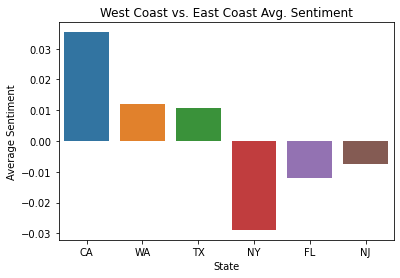

In [0]:
ax = sns.barplot(x = 'State', y = 'Average Sentiment', data = df5).set_title('West Coast vs. East Coast Avg. Sentiment')

In [0]:
# Avg. Sentiment by state
df3 = pd.concat([df2.unique()

In [0]:
# Unique Dates and Unique Races
Unique_date = df['date'].dropna().unique() 
Unique_race = df['race'].dropna().unique()

DataFrameDate = {elem : df for elem in Unique_date}
DataFrameRace = {elem : df for elem in Unique_race}

def Sep():
    for key in DataFrameDate.keys():
            DataFrameDate[key] = df[:][df.date == key]
            # yoyo.append(np.mean(DataFrameDate[key].score))
    for key in DataFrameRace.keys():
            DataFrameRace[key] = df[:][df.race == key]
            print(str(key) + " " + str(np.mean(DataFrameRace[key].score)))
Sep()
# date_data = zip(DataFrameDate.keys(), np.mean(DataFrameDate[key].score))
# print(DataFrameRace)

GreaterEuropean,WestEuropean,Germanic -0.006881841080833426
GreaterAfrican,Africans 0.029097787948131254
GreaterEuropean,British -0.012136204444805796
GreaterEuropean,WestEuropean,Hispanic -0.002227246735182433
GreaterEuropean,EastEuropean -0.007552631578947298
Asian,IndianSubContinent 0.04565912789669146
GreaterEuropean,Jewish -8.066029830723006e-05
GreaterEuropean,WestEuropean,French -0.01369650733236286
GreaterEuropean,WestEuropean,Nordic -0.005629157772171426
Asian,GreaterEastAsian,EastAsian 0.004045384312567831
Asian,GreaterEastAsian,Japanese 0.01965316672372483
GreaterEuropean,WestEuropean,Italian -0.008491245071175692
GreaterAfrican,Muslim 0.014330751062824817


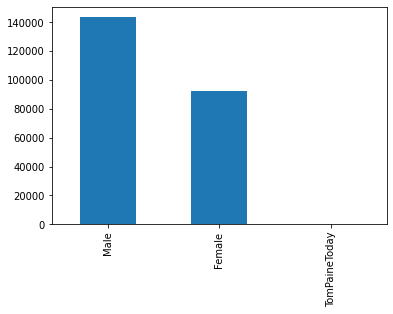

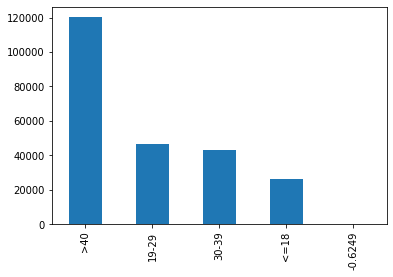

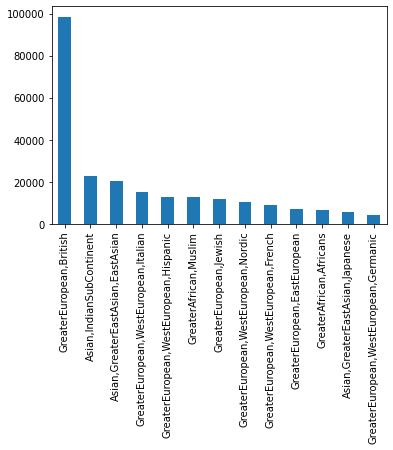

In [0]:
# Num_tweets bar graph
import matplotlib.pyplot as plt
import seaborn as sns

l = df['gender'].value_counts()
m = df['age'].value_counts()
o = df['race'].value_counts()

l.plot.bar()
plt.show()

m.plot.bar()
plt.show()

o.plot.bar()
plt.show()

In [0]:
dates = []
lala = []

# March Dates
for i in range(23, 32):
  dates.append("Mar" + str(i))

# April Dates
for i in range(1, 10):
  dates.append("Apr0" + str(i))
for i in range(10, 14):
  dates.append("Apr0" + str(i))

for i in range(1, len(dates)+1):
  lala.append(i)
yolo = dict(zip(dates, lala))
print(yolo)

{'Mar23': 1, 'Mar24': 2, 'Mar25': 3, 'Mar26': 4, 'Mar27': 5, 'Mar28': 6, 'Mar29': 7, 'Mar30': 8, 'Mar31': 9, 'Apr01': 10, 'Apr02': 11, 'Apr03': 12, 'Apr04': 13, 'Apr05': 14, 'Apr06': 15, 'Apr07': 16, 'Apr08': 17, 'Apr09': 18, 'Apr010': 19, 'Apr011': 20, 'Apr012': 21, 'Apr013': 22}


In [0]:
df3['rural_suburban_urban'] = df3['rural_suburban_urban'].astype("int")
x_2 = []
u = ['1', '2', '3', '4', '5', '6', '7', '8', '9']
for i in u:
  x = np.mean(df3[df3['rural_suburban_urban'] == i].score)
  x_2.append(x)
print(x_2)

TypeError: ignored

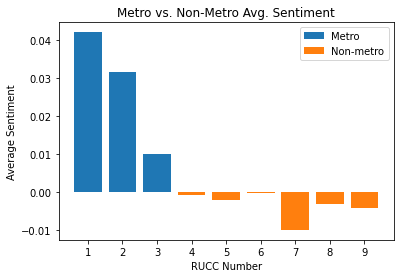

In [0]:
p1 = plt.bar([1, 2, 3], y)
p2 = plt.bar([4, 5, 6, 7, 8, 9], y_3)
plt.ylabel('Average Sentiment')
plt.xlabel('RUCC Number')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9])
plt.title('Metro vs. Non-Metro Avg. Sentiment')
plt.legend((p1[0], p2[0]), ('Metro', 'Non-metro'))

In [0]:
import plotly.express as px

ax = px.bar(x=u,y=y_3, labels={'RUC Number', 'Avg. Sentiment'})
ax.update_layout(
    xaxis_title="RUC Number",
    yaxis_title="Avg. Sentiment")
ax.show()

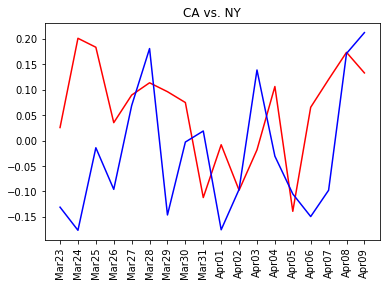

In [0]:
flat_list = dates
x1 = []
x2 = []
x3 = []
for item in flat_list: ##Flat_list is just all the dates in order。 #
    x = np.mean(df3[df3['date'] == item].score)
    x1.append(x)
x = list(range(0,len(flat_list)))
plt.xticks(x, flat_list, rotation='vertical')

f = df3[df3['state'] == "CA"]
for item in flat_list: ##Flat_list is just all the dates in order。 #
    x = np.mean(f[f['date'] == item].score)
    x2.append(x)

plt.plot(flat_list, x2, color='red')

c = df3[df3['state'] == "NY"]
for item in flat_list: ##Flat_list is just all the dates in order。 #
    x = np.mean(c[c['date'] == item].score)
    x3.append(x)
    
plt.plot(flat_list, x3, color='blue')


e = df[df3]
# plot[6].set_color('r')
# plot[7].set_color('r')



# plot[13].set_color('r')
# plot[14].set_color('r')




# plot[20].set_color('r')
# plot[21].set_color('r')

plt.title("CA vs. NY")
plt.show()


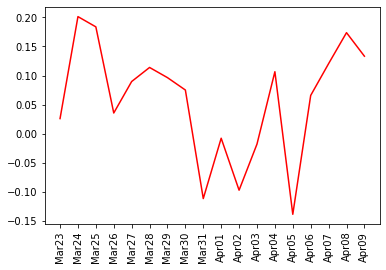

In [0]:
x2 = []
f = df3[df3['state'] == "CA"]
for item in flat_list: ##Flat_list is just all the dates in order。 #
    x = np.mean(f[f['date'] == item].score)
    x2.append(x)
    x = list(range(0,len(flat_list)))
    plt.xticks(x, flat_list, rotation='vertical')
plt.plot(flat_list, x2, color='red')

In [0]:
import scipy as sc
df4 = df3['median_household_income'].dropna()


6973    57633.0
6974    56538.0
6975    71746.0
6976    35097.0
6977    71772.0
Name: median_household_income, dtype: float64

In [0]:
df4 = df3.dropna(subset=['score', 'rural_suburban_urban'])
sc.stats.pearsonr(df4['score'], df4['rural_urban_suburban'])

KeyError: ignored

In [0]:
import plotly.graph_objects as go 
income_fig = px.histogram(df3, x='median_household_income', y=df3['score'], nbins=10)
income_fig.show()

In [0]:
df3.dtypes

level_0                      int64
index                        int64
Unnamed: 0                   int64
Unnamed: 0.1                 int64
Unnamed: 0.1.1              object
Tweet_id                    object
name                        object
id                          object
location                    object
text                        object
sentiment                   object
age                         object
gender                      object
date                        object
time                        object
race                        object
score                      float64
screen_name                 object
Unnamed: 0.1.1.1           float64
zipcode                     object
state                       object
median_household_income     object
pop_density                 object
county                      string
rural_suburban_urban        string
county_name                 string
dtype: object

In [0]:
df3['median_household_income'] = df3['median_household_income'].astype("float")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [0]:
bins =  np.linspace(df3.median_household_income.min(), df3.median_household_income.max(), 10)
groups = df3.groupby(np.digitize(df3.median_household_income, bins))
groups.mean().score

1     0.031129
2     0.017167
3    -0.005079
4     0.000003
5    -0.017097
6     0.056896
7    -0.029976
9    -0.709600
10    0.066141
Name: score, dtype: float64

In [0]:
l = []
m = []
for b in bins:
  l.append(b)
print(l)

[14504.0, 31049.444444444445, 47594.88888888889, 64140.333333333336, 80685.77777777778, 97231.22222222222, 113776.66666666667, 130322.11111111112, 146867.55555555556, 163413.0]


In [0]:
m = list(groups.mean().score)
hey = pd.DataFrame(zip(l, m), columns=['Income Bins', 'Avg. Sentiment'])
hey.tail()

,Income Bins,Avg. Sentiment
4,80685.777778,-0.017097
5,97231.222222,0.056896
6,113776.666667,-0.029976
7,130322.111111,-0.709600
8,146867.555556,0.066141


In [0]:
df3.head()

,level_0,index,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Tweet_id,name,id,location,text,sentiment,age,gender,date,time,race,score,screen_name,Unnamed: 0.1.1.1,zipcode,state,median_household_income,pop_density,county,rural_suburban_urban,county_name
0,7,22,22,22,22,1246018579151179800,Steve Finlay,176126108,"Newfoundland, Canada",NEW | Homemade masks won't protect you against...,Positive,30-39,Male,Apr03,10:15:53,"GreaterEuropean,British",0.0813,Electr0z,NaN,10001,NY,81671.0,33959,New York County,1,New York
1,11,30,30,30,30,1246106235545571300,JM Ngala,1527509845,"Nairobi, Kenya","Didier Drogba, Samuel Eto'o and Demba Ba slamm...",Positive,30-39,Male,Apr03,16:04:12,"Asian,GreaterEastAsian,EastAsian",0.1471,john_lij,NaN,03901,ME,63264.0,192,York County,1,York
2,12,32,32,32,32,1246244571832397800,AB Momentum Massage,347580948,"Edmonton, AB, Canada",Canadians vs Americans during a time of crisis...,Positive,>40,Female,Apr04,01:13:54,"GreaterEuropean,WestEuropean,Nordic",0.6369,AlbertaMomentum,NaN,98001,WA,71746.0,1717,King County,1,King
3,19,52,52,52,52,1246243309871341600,Geeky Hoody,2817977711,"Dallas, TX",I make this look Safe. Thanks mamazolaemporium...,Positive,<=18,Male,Apr04,01:08:53,"Asian,IndianSubContinent",0.7003,geekyhoody,NaN,43001,OH,76806.0,90,Licking County,1,Licking
4,32,83,83,83,83,1245925985821716500,Melissa,867592382069342208,"Auburn, WA","Ok, Twitter, you asked for it, I promised it, ...",Neutral,>40,Female,Apr03,04:07:57,"GreaterEuropean,WestEuropean,Italian",0.0387,Marusyllus,NaN,36272,AL,37973.0,40,Calhoun County,8,Calhoun


In [0]:
for i, row in df3.iterrows():
  if (df3.at[i, 'median_household_income'] >= 130000) and (df3.at[i, 'score'] <= -0.8):
    print(i)

1164
1217
2454
4591


In [0]:
income_score = px.bar(hey, x='Income Bins', y = 'Avg. Sentiment')
income_score.show()

In [0]:
data = pd.concat((df3['median_household_income'], df3['score']), axis=1)
data.dtypes

median_household_income    float64
score                      float64
dtype: object

In [0]:
digitized = np.digitize(data, bins)

TypeError: ignored

In [0]:

bin_means = [data[digitized == i].mean() for i in range(1, len(bins))]
print(bin_means)

TypeError: ignored